In [1]:
import matplotlib.pyplot as plt
 
import pandas as pd
import numpy as np
 

In [2]:
 data = pd.read_csv("BloodResults.csv")

In [3]:
print(data.head(5))

    Turtle ID Trip Date  Trip Month  Trip Day    BMI  Hemolysis  Lipemia  \
0  CC081816-1   8/18/16           8        18  12.79          0        0   
1  CC050417-1    5/4/17           5         4  13.79          0        1   
2  CC050417-3    5/4/17           5         4  14.70          0        0   
3  CC060617-2    6/6/17           6         6  16.63          0        0   
4  CC062017-1   6/20/17           6        20  11.80          0        1   

   Amylase   AST    CPK    ...  CO2    Glucose    BUN   Anion Gap    \
0       378    171    877  ...     24         81    13            3   
1      1126    346   1138  ...     28        115     8            7   
2       582    179   1061  ...     25         76    11            9   
3       478    297    574  ...     28         73     3            2   
4       656    182   1246  ...     21         79    14            2   

   Osmolality    Phosphorus    UricAcid    Total Protein    Triglycerides   \
0           273           7.9         

In [4]:
print("Describe Data")
print(data.describe())

Describe Data
       Trip Month   Trip Day        BMI  Hemolysis    Lipemia     Amylase   \
count    57.00000  57.000000  57.000000  57.000000  57.000000    57.000000   
mean      6.45614  17.140351  13.415263   0.754386   0.157895   554.824561   
std       1.16604   9.201007   1.290955   0.931219   0.413585   202.355515   
min       5.00000   1.000000  11.200000   0.000000   0.000000   137.000000   
25%       5.00000  10.000000  12.600000   0.000000   0.000000   406.000000   
50%       6.00000  17.000000  13.270000   0.000000   0.000000   546.000000   
75%       8.00000  25.000000  14.200000   1.000000   0.000000   658.000000   
max       8.00000  31.000000  16.630000   4.000000   2.000000  1126.000000   

            AST          CPK    Calcium    Cholesterol    ...  Chloride    \
count   57.000000    57.000000  57.000000      57.000000  ...   57.000000   
mean   190.000000  1039.877193  10.543860     191.350877  ...  118.473684   
std     81.122482  1501.935407   4.202551      60.41

In [5]:
df = pd.DataFrame(data)

In [6]:
print(df)


      Turtle ID Trip Date  Trip Month  Trip Day    BMI  Hemolysis  Lipemia  \
0    CC081816-1   8/18/16           8        18  12.79          0        0   
1    CC050417-1    5/4/17           5         4  13.79          0        1   
2    CC050417-3    5/4/17           5         4  14.70          0        0   
3    CC060617-2    6/6/17           6         6  16.63          0        0   
4    CC062017-1   6/20/17           6        20  11.80          0        1   
5    CC072117-1   7/21/17           7        21  12.91          0        0   
6    CC072117-3   7/21/17           7        21  14.24          0        0   
7    CC080817-1    8/8/17           8         8  12.34          0        0   
8    CC080817-2    8/8/17           8         8  13.50          0        0   
9    CC080817-3    8/8/17           8         8  12.91          0        0   
10   CC051218-1   5/12/18           5        12  11.94          2        1   
11   CC051218-2   5/12/18           5        12  13.27          

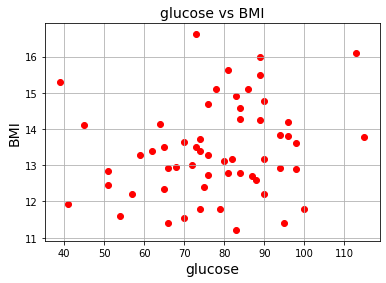

In [7]:
plt.scatter(df['Glucose  '], df[' BMI'],  color='red')  
plt.title('glucose vs BMI', fontsize=14)
plt.xlabel('glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.show()

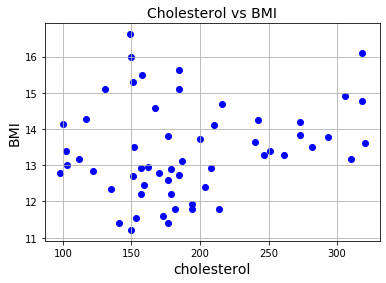

In [25]:
plt.scatter(df['Cholesterol  '], df[' BMI'], color='blue')
plt.title('Cholesterol vs BMI', fontsize=14)
plt.xlabel('cholesterol', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.show()

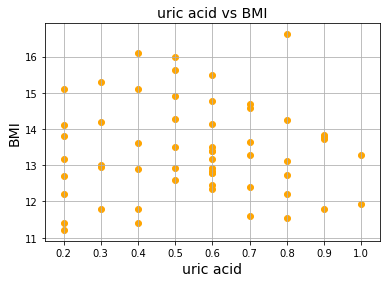

In [23]:
plt.scatter(df['UricAcid  '], df[' BMI'], color='orange')
plt.title('uric acid vs BMI', fontsize=14)
plt.xlabel('uric acid', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.show()

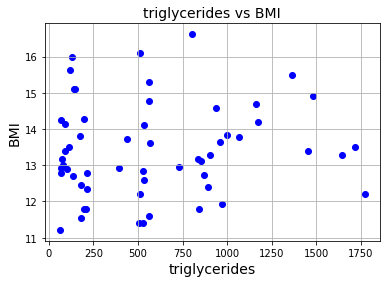

In [24]:
plt.scatter(df['Triglycerides '], df[' BMI'], color='blue')
plt.title('triglycerides vs BMI', fontsize=14)
plt.xlabel('triglycerides', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.show()

In [11]:
from sklearn import linear_model
import statsmodels.api as sm

In [12]:
X = df[['Glucose  ','Cholesterol  ', 'UricAcid  ','Triglycerides ' ]]
Y = df[' BMI']

In [13]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 12.026211876296454
Coefficients: 
 [ 1.13132452e-02  2.91795113e-03 -2.07104625e-01  1.11754988e-04]


In [15]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.8342
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.510
Time:                        22:16:23   Log-Likelihood:                -93.159
No. Observations:                  57   AIC:                             196.3
Df Residuals:                      52   BIC:                             206.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.0262      0.998     12.

/Users/vivianhernandez/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
Z = df[['Glucose  ','Cholesterol  ' ]]
 

In [22]:
# with statsmodels
Z = sm.add_constant(Z) # adding a constant
 
model2 = sm.OLS(Y, Z).fit()
predictions = model2.predict(Z) 
 
print_model = model2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.686
Date:                Sat, 08 Aug 2020   Prob (F-statistic):              0.195
Time:                        22:24:05   Log-Likelihood:                -93.205
No. Observations:                  57   AIC:                             192.4
Df Residuals:                      54   BIC:                             198.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.9325      0.869     13.736